In [ ]:
# BMW pricing challenge. Estimating price of Used cars

# Exploratory data analysis

In [222]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
data=pd.read_csv('bmw_pricing_challenge.csv')

In [224]:
data.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [225]:
y=data["price"] #dependant variable
data.drop(['price'],axis=1,inplace=True)
x=data #Independant features

In [226]:
x.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,2018-04-01


In [227]:
print(f'X shape----{x.shape} Y shape----- {y.shape}')

X shape----(4843, 17) Y shape----- (4843,)


# Data Exploration

In [228]:
x.isnull().sum() #No missing values

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
sold_at              0
dtype: int64

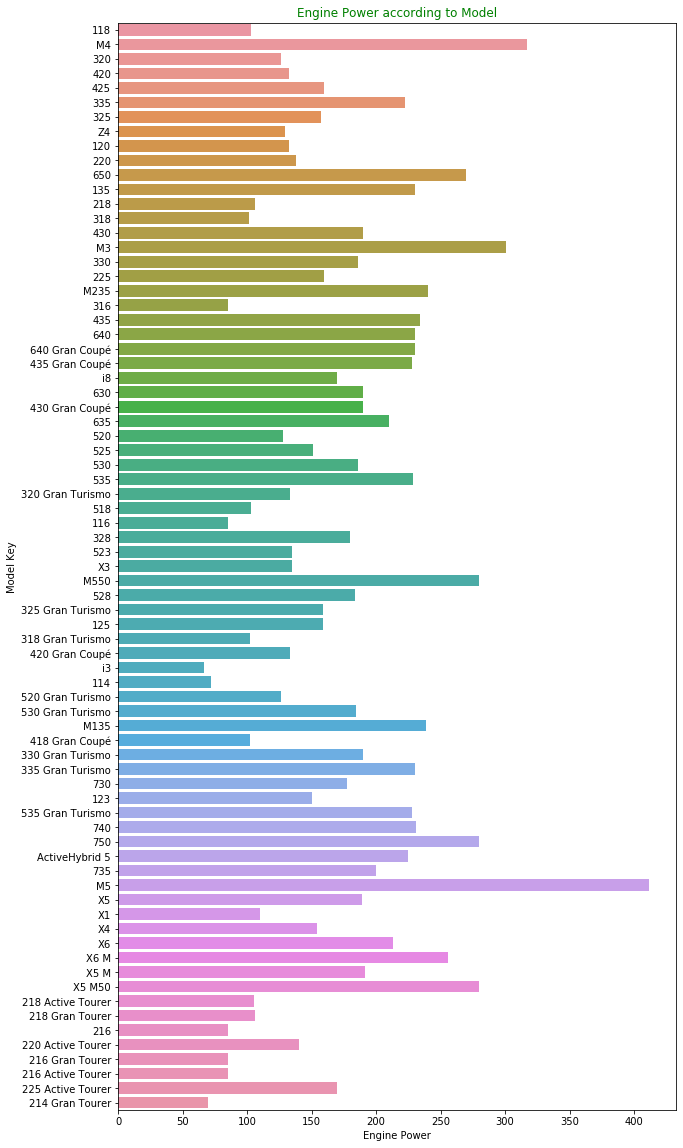

In [213]:
model_key=data['model_key'].unique()
engine_power=[]
for i in model_key:
    u=data[data['model_key']==i]
    engine_power.append(sum(u['engine_power']/len(u)))
plt.figure(figsize=(10,20))
sns.barplot(x=engine_power,y=model_key)
plt.xlabel("Engine Power")
plt.ylabel("Model Key")
plt.title("Engine Power according to Model", color="green")
plt.show()

# Mileage study

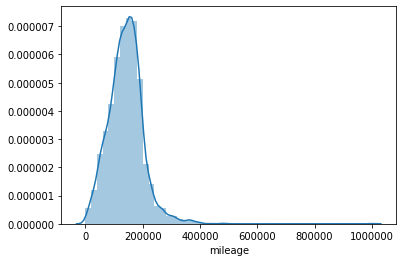

In [214]:
sns.distplot(x['mileage'])

<function matplotlib.pyplot.show(*args, **kw)>

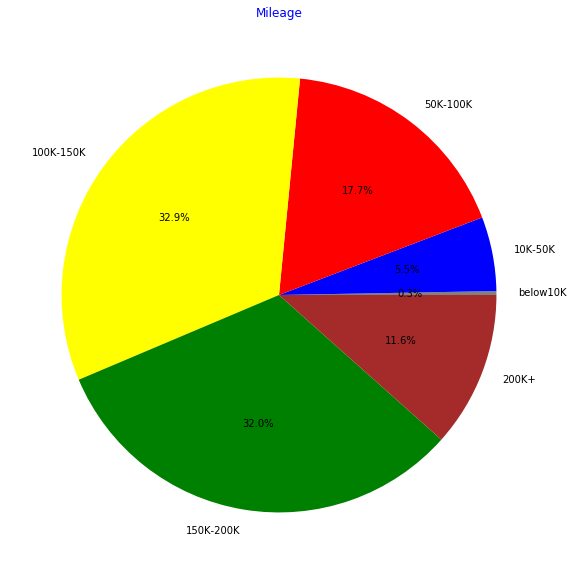

In [215]:
mileage=[]
labels = ['below10K','10K-50K','50K-100K','100K-150K','150K-200K','200K+']
colors=['grey','blue','red','yellow','green','brown']
explode=[0,0,0,0,0,0]
for i in range(0,21):
    i=i*10000
    if(i==10000):
        x=data[data['mileage']<10000]
        mileage.append(len(x))
    elif(i==50000):
        x = data[(data['mileage']>=10000) & (data['mileage']<50000)]
        mileage.append(len(x))
    elif(i==100000):
        x = data[(data['mileage']>=50000) & (data['mileage']<100000)]
        mileage.append(len(x))
    elif(i==150000):
        x = data[(data['mileage']>=100000) & (data['mileage']<150000)]
        mileage.append(len(x))
    elif(i==200000):
        x = data[(data['mileage']>=150000) & (data['mileage']<200000)]
        mileage.append(len(x))
        x = data[data['mileage']>=200000]
        mileage.append(len(x))
plt.figure(figsize=(10,10))
plt.pie(mileage,explode=explode,labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Mileage',color='blue')
plt.show

  # Registration Date visualization

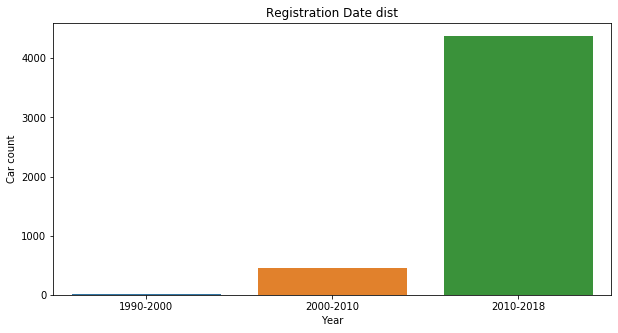

In [216]:
date_count=[]
year=['1990-2000','2000-2010','2010-2018']
for i in range(1,4):
    if(i==1):
        x=data[(data['registration_date']>="1990-03-01") & (data['registration_date']<"2000-01-01")]
        date_count.append(len(x))
    elif(i==2):
        x = data[(data['registration_date']>="2000-01-01") & (data['registration_date']<"2010-01-01")]
        date_count.append(len(x))
    elif(i==3):
        x = data[(data['registration_date']>="2010-01-01") & (data['registration_date']<"2018-01-01")]
        date_count.append(len(x))
plt.figure(figsize=(10,5))
sns.barplot(x=year,y=date_count)
plt.xlabel("Year")
plt.ylabel("Car count")
plt.title("Registration Date dist")
plt.show()

# Fuel type visualization

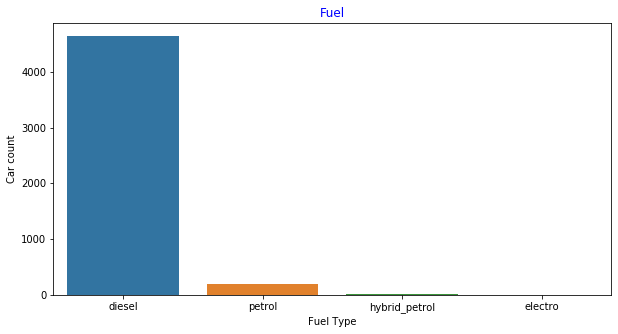

In [217]:
plt.figure(figsize=(10,5))
sns.countplot(data['fuel'])
plt.xlabel("Fuel Type")
plt.title('Fuel',color="blue")
plt.ylabel("Car count")
plt.show()


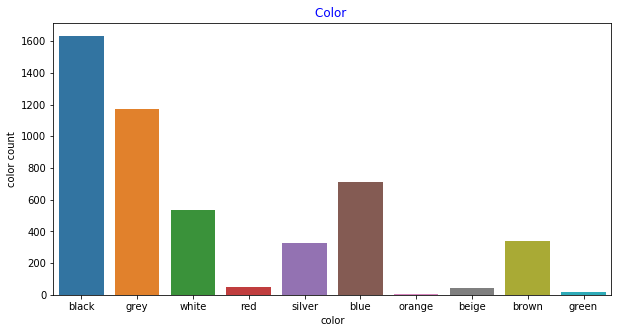

In [218]:
plt.figure(figsize=(10,5))
sns.countplot(data['paint_color'])
plt.xlabel("color")
plt.title('Color ',color="blue")
plt.ylabel("color count")
plt.show()

In [229]:
print(f'X shape----{x.shape} Y shape----- {y.shape}')

X shape----(4843, 17) Y shape----- (4843,)


# Data cleaning

In [230]:
x.drop(['maker_key','model_key'],axis=1,inplace=True) #Deleting unnecessary columns

In [231]:
print(f'X shape----{x.shape} Y shape----- {y.shape}')

X shape----(4843, 15) Y shape----- (4843,)


In [232]:
x["registration_date_encoded"]=[1 if(i>="1990-03-01" and i<"2000-01-01") else 2 if(i>="2000-01-01" and i<"2010-01-01")
                                else 3 for i in x['registration_date']]

# Fuel Type

In [233]:
x["fuel"]= x["fuel"].replace("diesel",1)
x['fuel'] = x['fuel'].replace("petrol",2)
x['fuel'] = x['fuel'].replace("hybrid_petrol",3)
x['fuel'] = x['fuel'].replace("electro",4)

# Color type

In [234]:
x['paint_color'] = x['paint_color'].replace("black",1)
x['paint_color'] = x['paint_color'].replace("grey",2)
x['paint_color'] = x['paint_color'].replace("white",3)
x['paint_color'] = x['paint_color'].replace("red",4)
x['paint_color'] = x['paint_color'].replace("silver",5)
x['paint_color'] = x['paint_color'].replace("blue",6)
x['paint_color'] = x['paint_color'].replace("orange",7)
x['paint_color'] = x['paint_color'].replace("beige",8)
x['paint_color'] = x['paint_color'].replace("brown",9)
x['paint_color'] = x['paint_color'].replace("green",10)

In [235]:
print(f'X shape----{x.shape} Y shape----- {y.shape}')

X shape----(4843, 16) Y shape----- (4843,)


# Feature type

In [236]:
x['feature_1'] = x['feature_1'].replace(True,1)
x['feature_1'] = x['feature_1'].replace(False,0)
x['feature_2'] = x['feature_2'].replace(True,1)
x['feature_2'] = x['feature_2'].replace(False,0)
x['feature_3'] = x['feature_3'].replace(True,1)
x['feature_3'] = x['feature_3'].replace(False,0)
x['feature_4'] = x['feature_4'].replace(True,1)
x['feature_4'] = x['feature_4'].replace(False,0)
x['feature_5'] = x['feature_5'].replace(True,1)
x['feature_5'] = x['feature_5'].replace(False,0)
x['feature_6'] = x['feature_6'].replace(True,1)
x['feature_6'] = x['feature_6'].replace(False,0)
x['feature_7'] = x['feature_7'].replace(True,1)
x['feature_7'] = x['feature_7'].replace(False,0)
x['feature_8'] = x['feature_8'].replace(True,1)
x['feature_8'] = x['feature_8'].replace(False,0)

In [254]:
x['car_type'].unique()
x['car_type'] = x['car_type'].replace("convertible",1)
x['car_type'] = x['car_type'].replace("coupe",2)
x['car_type'] = x['car_type'].replace("estate",3)
x['car_type'] = x['car_type'].replace("hatchback",4)
x['car_type'] = x['car_type'].replace("sedan",5)
x['car_type'] = x['car_type'].replace("subcompact",6)
x['car_type'] = x['car_type'].replace("suv",7)
x['car_type'] = x['car_type'].replace("van",8)

# Sold at

In [237]:
x['sold_at_enc'] =[1 if(i=="2018-01-01") else 2 if(i=="2018-02-01") else 3 if(i=="2018-03-01")
                 else 4 if(i=="2018-04-01") else 5 if(i=="2018-05-01") else 6 if(i=="2018-06-01")
                 else 7 if(i=="2018-07-01") else 8 if(i=="2018-08-01")
                 else 9 if(i=="2018-09-01") else 0 for i in x['sold_at']]

In [238]:
x.drop(['registration_date','sold_at'],axis=1,inplace=True)

In [240]:
print(f'X shape----{x.shape} Y shape----- {y.shape}')

X shape----(4843, 15) Y shape----- (4843,)


# Prediction

In [255]:
#Test,Train split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [256]:
x_train

,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,registration_date_encoded,sold_at_enc
1215,119515,135,1,2,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3,5
432,234365,135,1,1,3,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3,2
4244,77356,105,1,1,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3,5
289,181297,105,1,9,3,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3,1
2585,144089,137,2,1,5,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,58189,100,1,1,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3,6
466,178174,190,1,6,3,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3,2
3092,39250,317,2,1,5,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3,5
3772,75065,140,1,3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,8


In [257]:
data_score = [] #To add list of all scores

# Gradient Boosting

In [258]:
#Importing necessary libraries
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor

In [275]:
gb = GradientBoostingRegressor(min_samples_leaf= 15, min_samples_split=2, learning_rate=0.1, max_depth=4, n_estimators=100)
gb.fit(x_train,y_train)
y_gb_pred=gb.predict(x_test)
print(gb.score(x_test,y_test))

0.7771161327930548


In [276]:
data_score.append(gb.score(x_test,y_test))

# Random Forest

In [279]:
rf=RandomForestRegressor(n_estimators=50, random_state = 42)
rf.fit(x_train,y_train)
print("R square value :", rf.score(x_test,y_test))

R square value : 0.7482078667963683


In [280]:
data_score.append(rf.score(x_test,y_test))

# Decision Tree

In [281]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
score=dt.score(x_test,y_test)
print(score)

0.5776179559014425


In [282]:
data_score.append(score)

In [283]:
data_score

[0.7771161327930548, 0.7482078667963683, 0.5776179559014425]

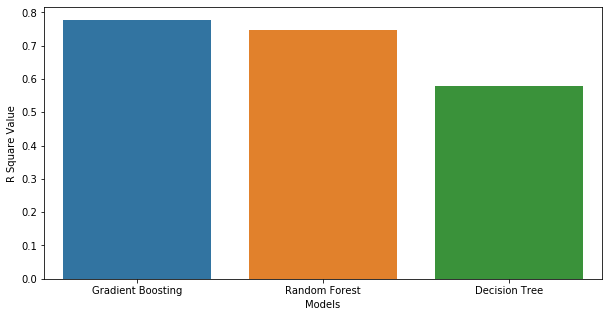

In [284]:
model_name=['Gradient Boosting','Random Forest','Decision Tree']
plt.figure(figsize=(10,5))
sns.barplot(x=model_name,y=data_score)
plt.ylabel("R Square Value")
plt.xlabel("Models")
plt.show()

# We achieved highest prediction of 77% accuracy using Gradient boosting technique

In [285]:
#Further can be improvised by changing hyper parameters and trying with different models